In [1]:
from collections import OrderedDict
import csv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# plot formatting

plt.rcParams['font.size'] = 10
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Gradient Descent

## Parts 2--7

<ipython-input-3-e0667364eb24>:37: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(squared_dists) / np.linalg.norm(b)
<ipython-input-3-e0667364eb24>:37: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(squared_dists) / np.linalg.norm(b)


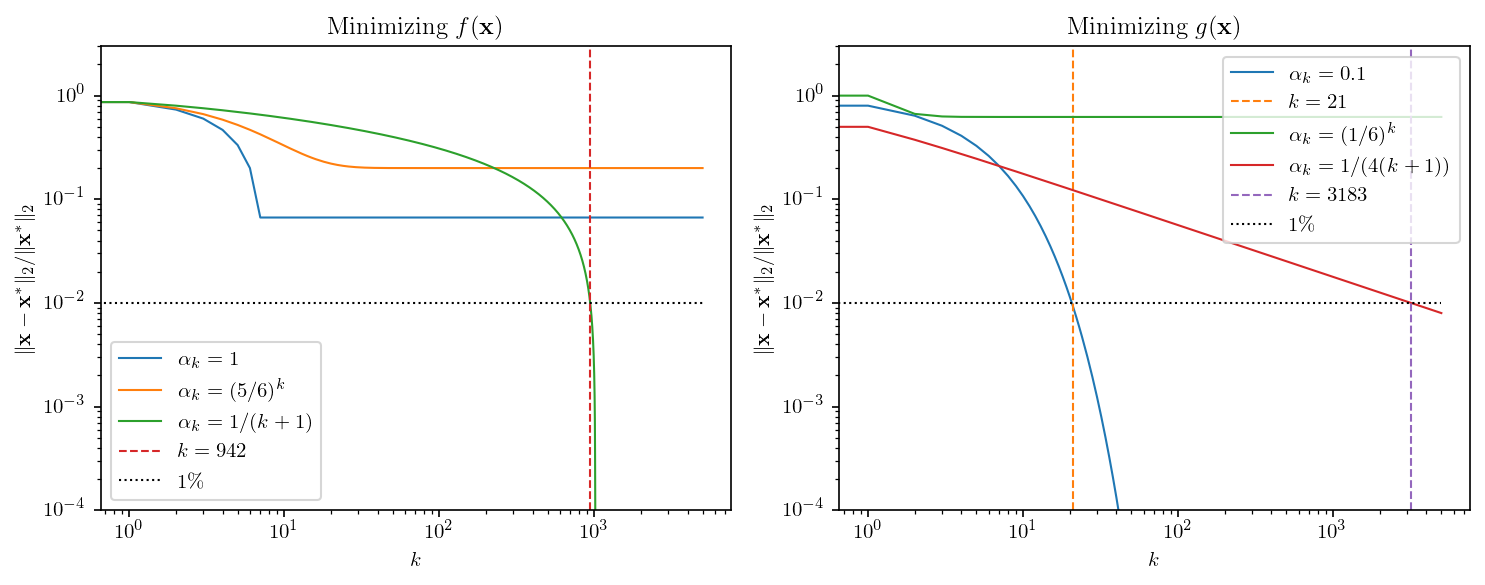

In [3]:
x_0 = np.zeros(2)
b = np.array([4.5, 6])
n_iter = 5000

f_grad = lambda x: (x - b) / np.linalg.norm(x - b)
g_grad = lambda x: 2 * (x - b)

f_step_sizes = OrderedDict([
    ('1', lambda k: 1),
    ('(5/6)^k', lambda k: (5 / 6)**k),
    ('1/(k+1)', lambda k: 1 / (k + 1))
])
g_step_sizes = OrderedDict([
    ('0.1', lambda k: 0.1),
    ('(1/6)^k', lambda k: (1 / 6)**k),
    ('1/(4(k+1))', lambda k: 1 / 4 / (k + 1))
])

f_k_estimates = [None, None, 942]
g_k_estimates = [21, None, 3183]

def run_gradient_descent(grad, x_0, step_size, n_iter=1000):
    
    xs = np.zeros((n_iter + 1, x_0.size))
    x = x_0.copy()
    xs[0, :] = x
    
    for k in range(n_iter):
        x = x - step_size(k) * grad(x)
        xs[k + 1, :] = x
    
    return xs

def relative_distance_from(xs, b):
    
    squared_dists = (xs ** 2).sum(1) - 2 * (xs @ b) + (b ** 2).sum()
    return np.sqrt(squared_dists) / np.linalg.norm(b)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
for i, (label, step_size) in enumerate(f_step_sizes.items()):
    plt.loglog(relative_distance_from(run_gradient_descent(f_grad, x_0, step_size, n_iter=n_iter), b),
               label=r'$\alpha_k = %s$' % label)
    if f_k_estimates[i] is not None:
        plt.plot([f_k_estimates[i]]*2, [1e-4, 3], '--', label=r'$k=%d$' % f_k_estimates[i])
plt.plot([0, n_iter], [0.01, 0.01], ':k', label=r'$1\%$')

plt.ylim(1e-4, 3)
plt.title(r'Minimizing $f(\mathbf{x})$')
plt.xlabel('$k$')
plt.ylabel(r'$\|\mathbf{x} - \mathbf{x^*}\|_2 / \|\mathbf{x^*}\|_2$')
plt.legend()

plt.subplot(1, 2, 2)
for i, (label, step_size) in enumerate(g_step_sizes.items()):
    plt.loglog(relative_distance_from(run_gradient_descent(g_grad, x_0, step_size, n_iter=n_iter), b),
               label=r'$\alpha_k = %s$' % label)
    if g_k_estimates[i] is not None:
        plt.plot([g_k_estimates[i]]*2, [1e-4, 3], '--', label=r'$k=%d$' % g_k_estimates[i])
plt.plot([0, n_iter], [0.01, 0.01], ':k', label=r'$1\%$')
    
plt.ylim(1e-4, 3)
plt.title(r'Minimizing $g(\mathbf{x})$')
plt.xlabel('$k$')
plt.ylabel(r'$\|\mathbf{x} - \mathbf{x^*}\|_2 / \|\mathbf{x^*}\|_2$')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()